In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##import dataset from google drive


In [2]:
#importing datset from google drive
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Reading the data file
teleco_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Customer-Churn.csv')

In [5]:
teleco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##Data Preperation

In [6]:
teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
teleco_df.tenure.max()

72

In [9]:
teleco_df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [10]:
teleco_df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
teleco_df.Churn.value_counts()/len(teleco_df)*100  #to find churn percentage

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

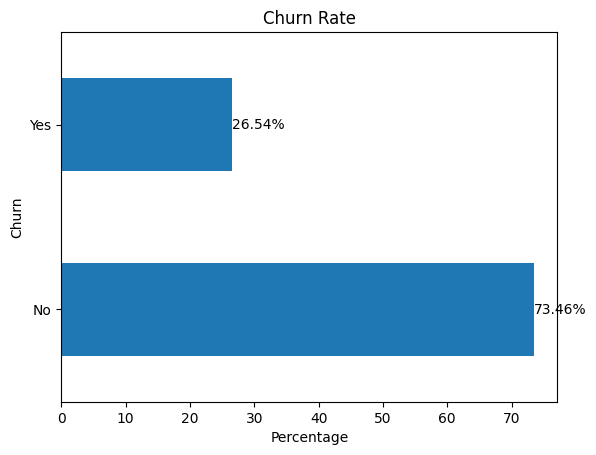

In [12]:
# Calculate churn rate
churn_rate = teleco_df['Churn'].value_counts() / len(teleco_df) * 100

# Create a horizontal bar plot
ax = churn_rate.plot(kind='barh')

# Add values to the bars
for i, v in enumerate(churn_rate):
    ax.text(v, i, str(round(v, 2)) + '%', color='black', va='center')

# Add labels and title
plt.title('Churn Rate')
plt.xlabel('Percentage')
plt.ylabel('Churn')
plt.show()

In [13]:
# TotalCharges is object type. So, Converting TotalCharges to float from object

In [14]:
teleco_df['TotalCharges'] = pd.to_numeric(teleco_df['TotalCharges'], errors='coerce')

In [15]:
teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
teleco_df.isnull().sum() #Counting the Null value in each variable

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

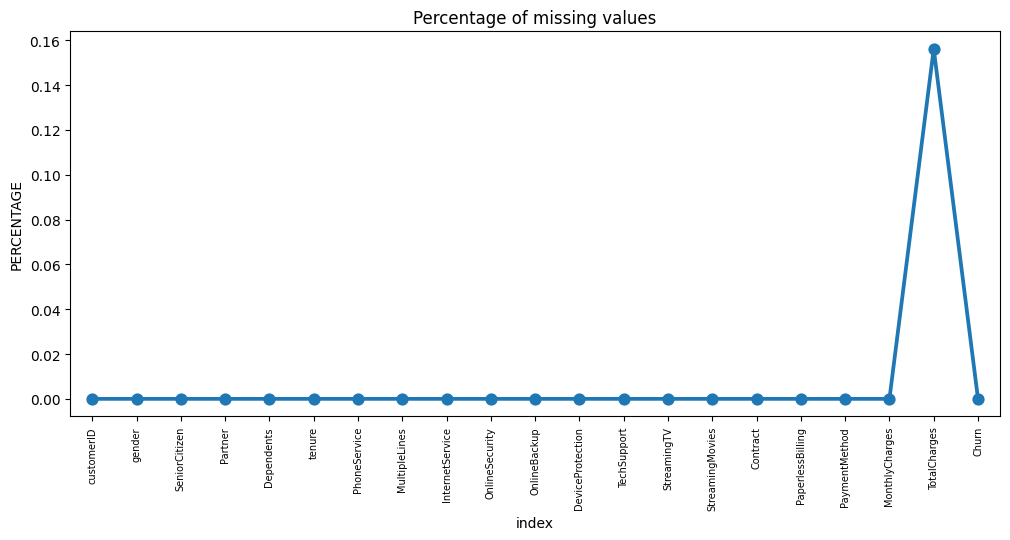

In [18]:
#creating a Point Plot to check missing values in each column
missing = pd.DataFrame((teleco_df.isnull().sum())*100/teleco_df.shape[0]).reset_index()
plt.figure(figsize=(12,5))
ax = sns.pointplot(x='index',y=0, data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of missing values')
plt.ylabel('PERCENTAGE')
plt.show()

##Missing Value Treatment
Since the % of missing vlaue records compared to total records is very low i.e. 0.15%, it is safe to ignore or drop from further processing.

In [19]:
#removing missing values

teleco_df.dropna(inplace=True)

In [20]:
teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [21]:
teleco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##Converting Numeric data to Categorical
For field Tenure, divide the data into bins e.g for tenure <12 months, 12-24, and so on..

In [22]:
teleco_df.tenure.max()

72

In [23]:
teleco_df.tenure.min()

1

In [24]:
#categorising 'tenure' vaariable isn 1-12,12-24,24-36 and so on..
labels = ['{}-{}'.format(i, i+11) for i in range(1,72,12)]
teleco_df['tenure_group'] = pd.cut(teleco_df.tenure, range(1,80,12), labels=labels, right=False)



In [25]:
teleco_df.tenure_group.value_counts()  #counting the value in each category

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [26]:
teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

In [27]:
teleco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Dropping unnecessary columns
CustomerID

tenure - we have a new column 'tenure_group'


In [28]:
teleco_df.drop(columns=['customerID', 'tenure'], inplace = True)

In [29]:
teleco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


##Data Exploration - EDA




### Categorical Univariate Analysis

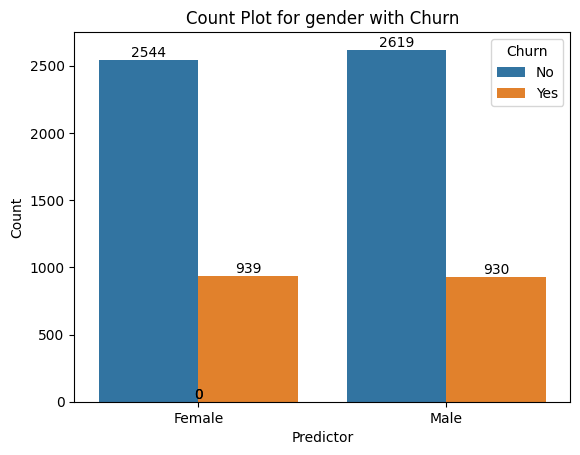

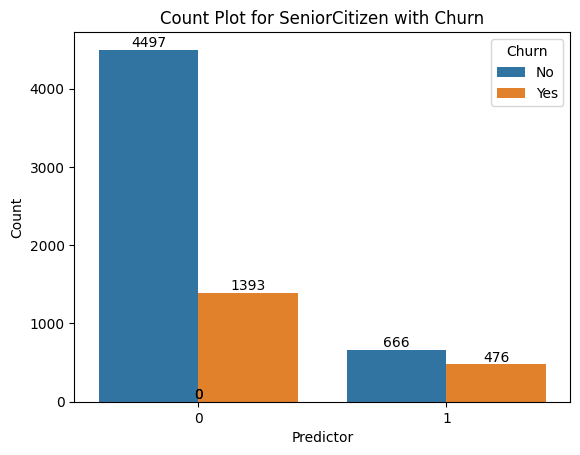

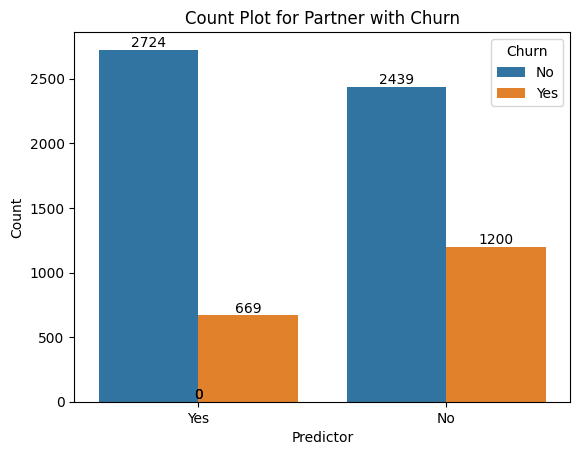

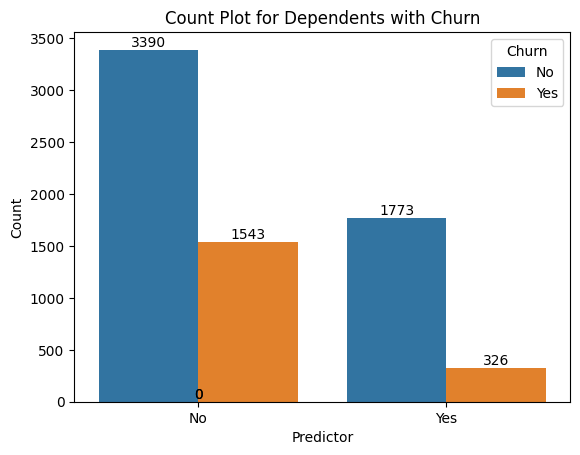

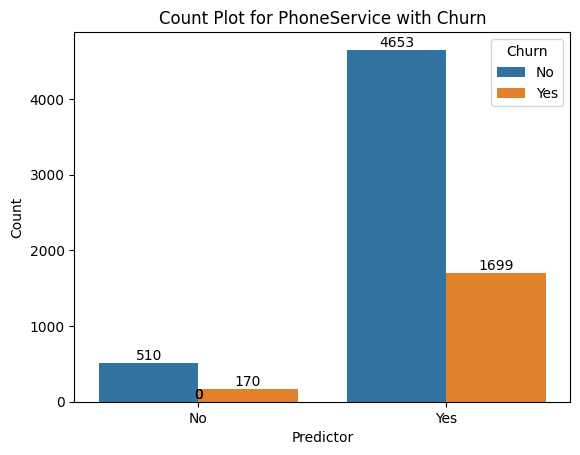

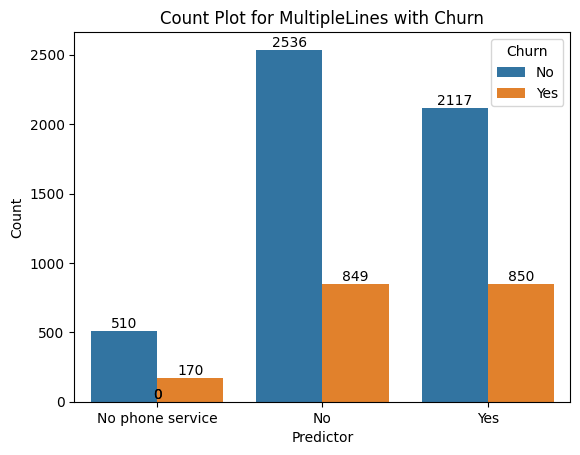

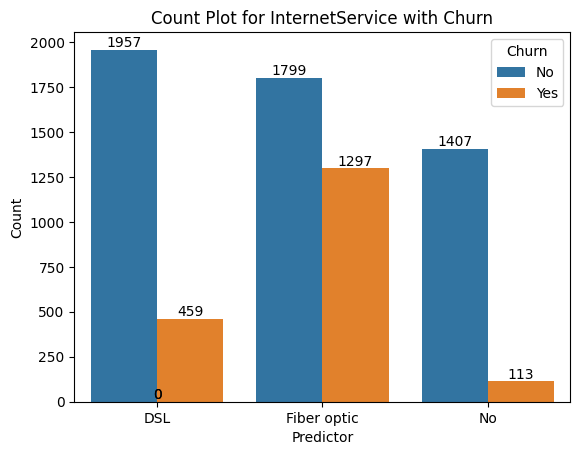

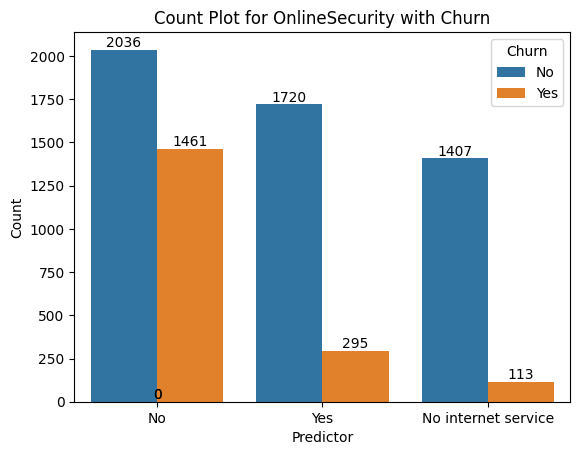

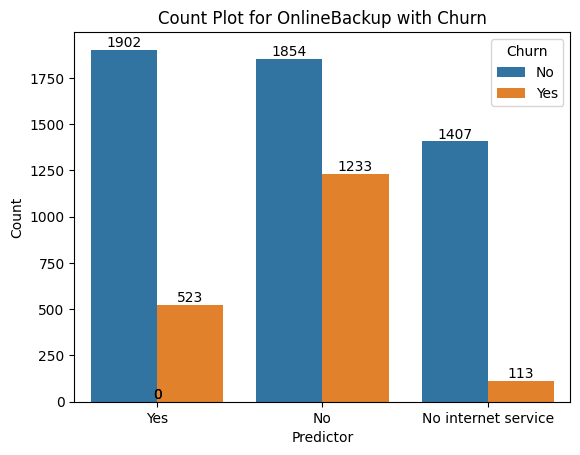

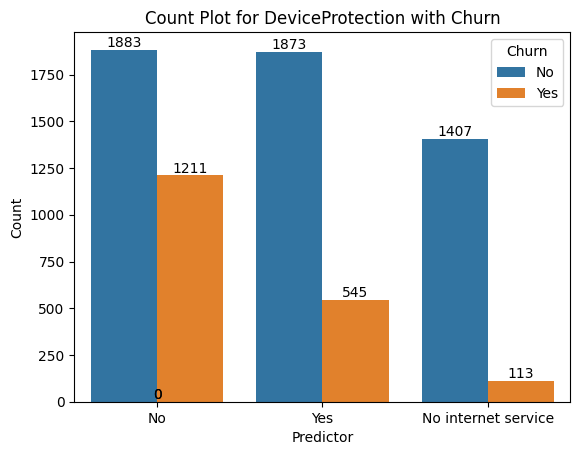

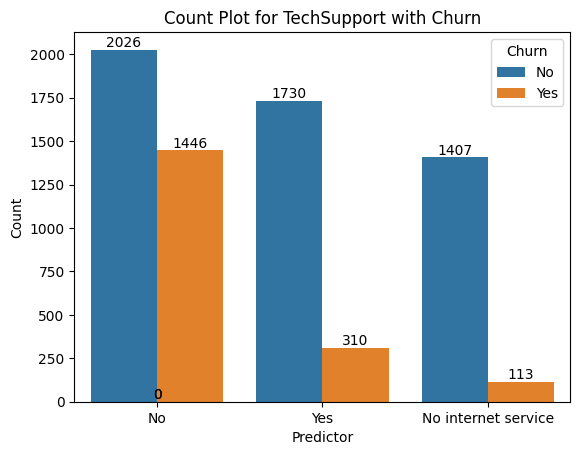

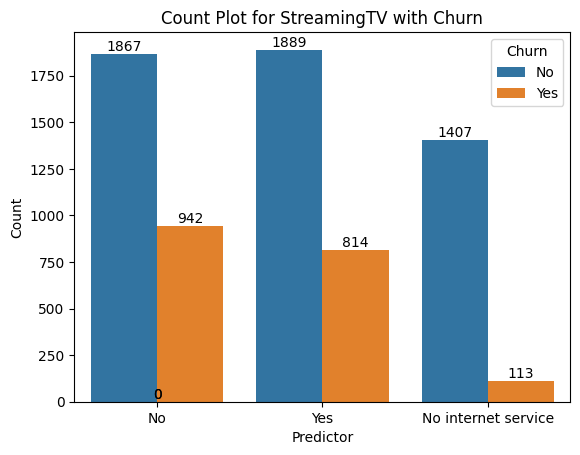

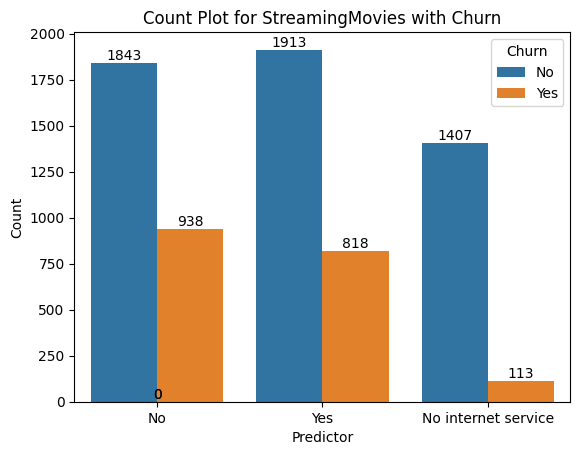

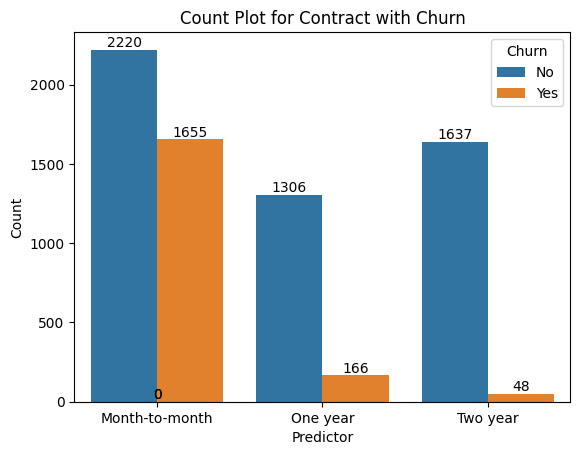

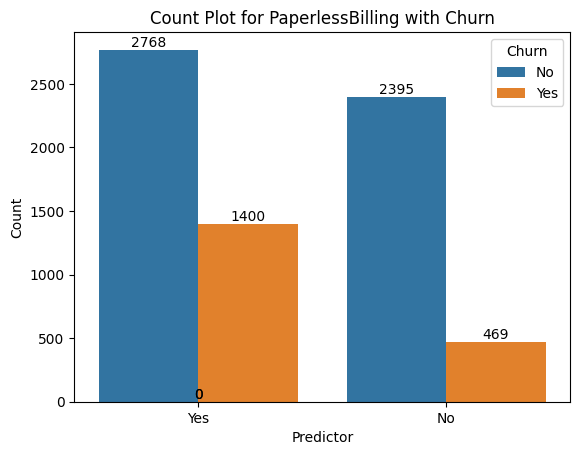

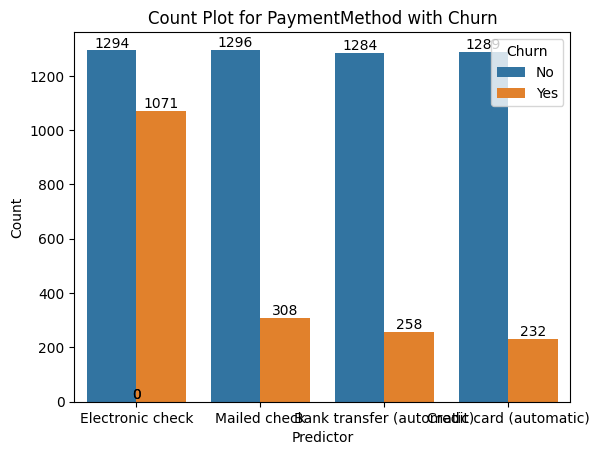

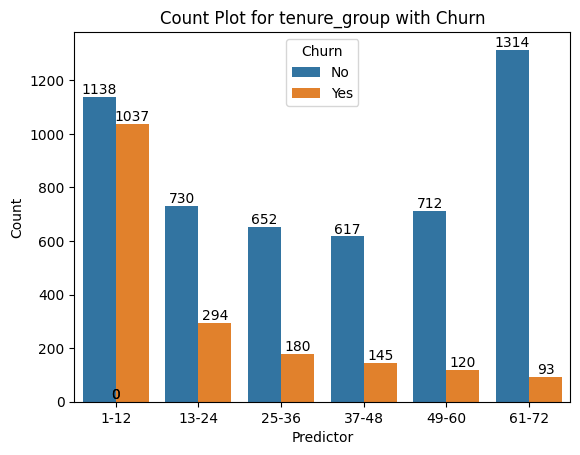

In [30]:
#iterate through the predictors and create count plots with labels
for i, predictor in enumerate(teleco_df.drop(columns=['Churn', 'TotalCharges','MonthlyCharges'])): #dropping the numerical columns 'TotalChrges' and 'MonthlyCharges' as well as Target Variable 'Churn'
  plt.figure(i)
  ax = sns.countplot(data=teleco_df, x=predictor, hue='Churn')

    # Add values on top of the bars
  for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

  plt.xlabel('Predictor')
  plt.ylabel('Count')
  plt.title('Count Plot for'+' '+ predictor +' '+'with Churn')



  plt.show()



### Numerical Univariate **Analysis**

####KDE Plot for Monthly Charges

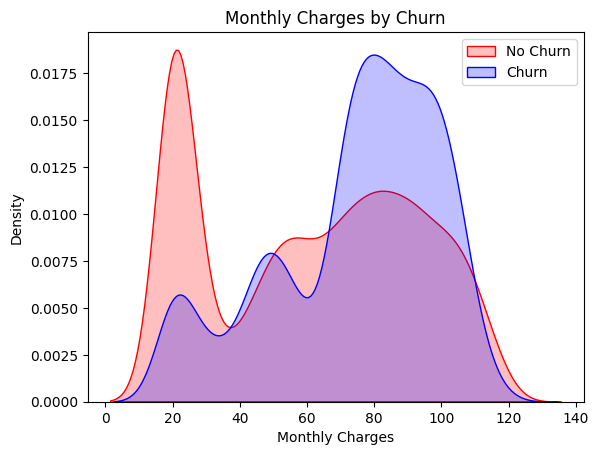

In [31]:
from textwrap import fill

# Plot KDE for MonthlyCharges
MonthlyCharges = sns.kdeplot(teleco_df.MonthlyCharges[(teleco_df.Churn == "No")], color='Red', fill=True)
MonthlyCharges = sns.kdeplot(teleco_df.MonthlyCharges[(teleco_df.Churn == "Yes")], color='Blue', fill=True)

# Set legend, labels, and title
MonthlyCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')
MonthlyCharges.set_title('Monthly Charges by Churn')

# Show plot
plt.show()

#####KDE Plot for Monthly Chrges "Churn" only

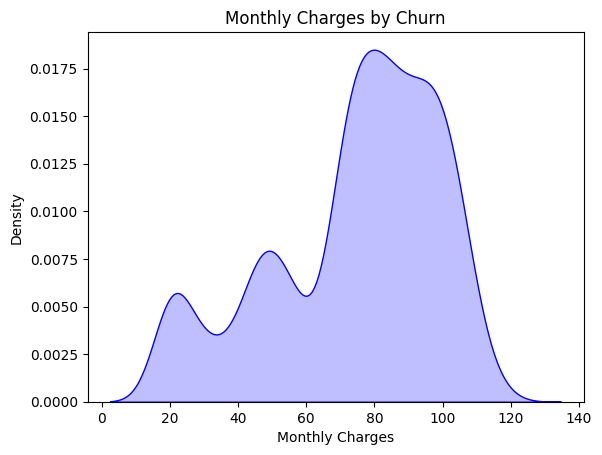

In [32]:
# Plot KDE for MonthlyCharges by Churn

sns.kdeplot(teleco_df.MonthlyCharges[(teleco_df.Churn == "Yes")], color='Blue', fill=True)
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Monthly Charges by Churn')

# Show plot
plt.show()

####KDE Plot for Total charges

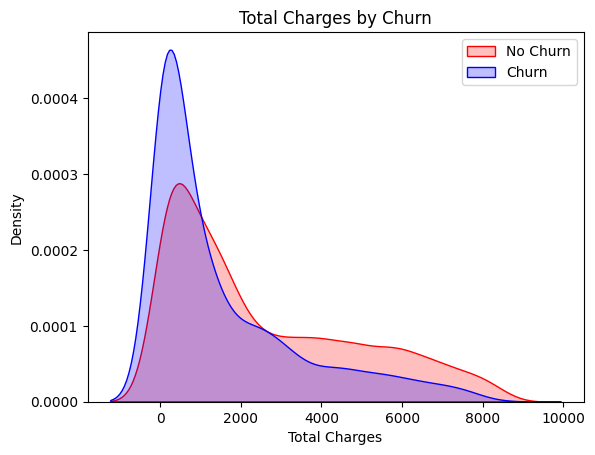

In [33]:
# Plot KDE for TotalCharges
TotalCharges = sns.kdeplot(teleco_df.TotalCharges[(teleco_df.Churn == "No")], color='Red', fill=True)
TotalCharges = sns.kdeplot(teleco_df.TotalCharges[(teleco_df.Churn == "Yes")], color='Blue', fill=True)

# Set legend, labels, and title
TotalCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('Total Charges')
TotalCharges.set_title('Total Charges by Churn')

# Show plot
plt.show()

#####KDE Plot for Total Chrges "Churn" only

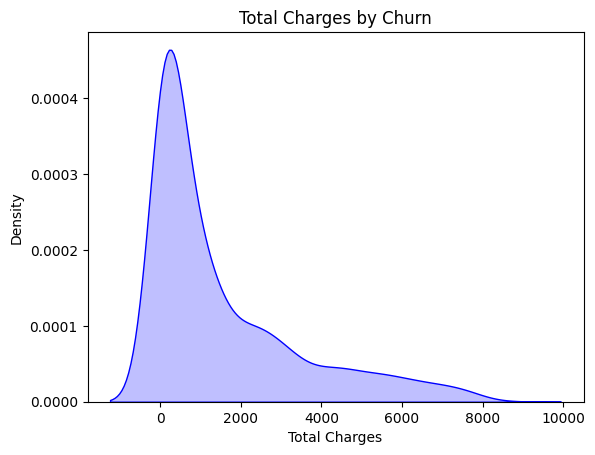

In [34]:
# Plot KDE for TotalCharges by Churn

sns.kdeplot(teleco_df.TotalCharges[(teleco_df.Churn == "Yes")], color='Blue', fill=True)
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Total Charges by Churn')

# Show plot
plt.show()

###Finding correlation between variables

- pearson's correlation coefficient: -1 to +1
- -1 --> Negative Correlation
- +1 --> Positive Correlation
- 0  --> No or less Correlation


In [35]:
teleco_df['MonthlyCharges'].corr(teleco_df['TotalCharges'])   #positive correlation

0.6510648032262027

#####By mistake, all records of the 'Churn' column converted to zero. Therefore, imported the 'Churn' column again from the file.


In [ ]:
New_Teleco = pd.read_excel('/content/Customer-Churn1.xlsx')

In [ ]:
New_Teleco

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
teleco_df['Churn'] = New_Teleco['Churn']

In [ ]:
teleco_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13-24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61-72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1-12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1-12


In [ ]:
teleco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 n

####Feature Encoding
For finding correlation coverting Categorical Variables into Numerical

In [36]:
teleco_df['Churn'] = np.where(teleco_df.Churn=='Yes', 1,0)

In [37]:
teleco_df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [38]:
teleco_dummies = pd.get_dummies(teleco_df)

In [39]:
teleco_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


####Ploting the correlation plot of entire data w.r.t Churn

In [40]:
teleco_dummies.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1-12                          0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

Insights: Customer with Month to Month Contract are highest Churners



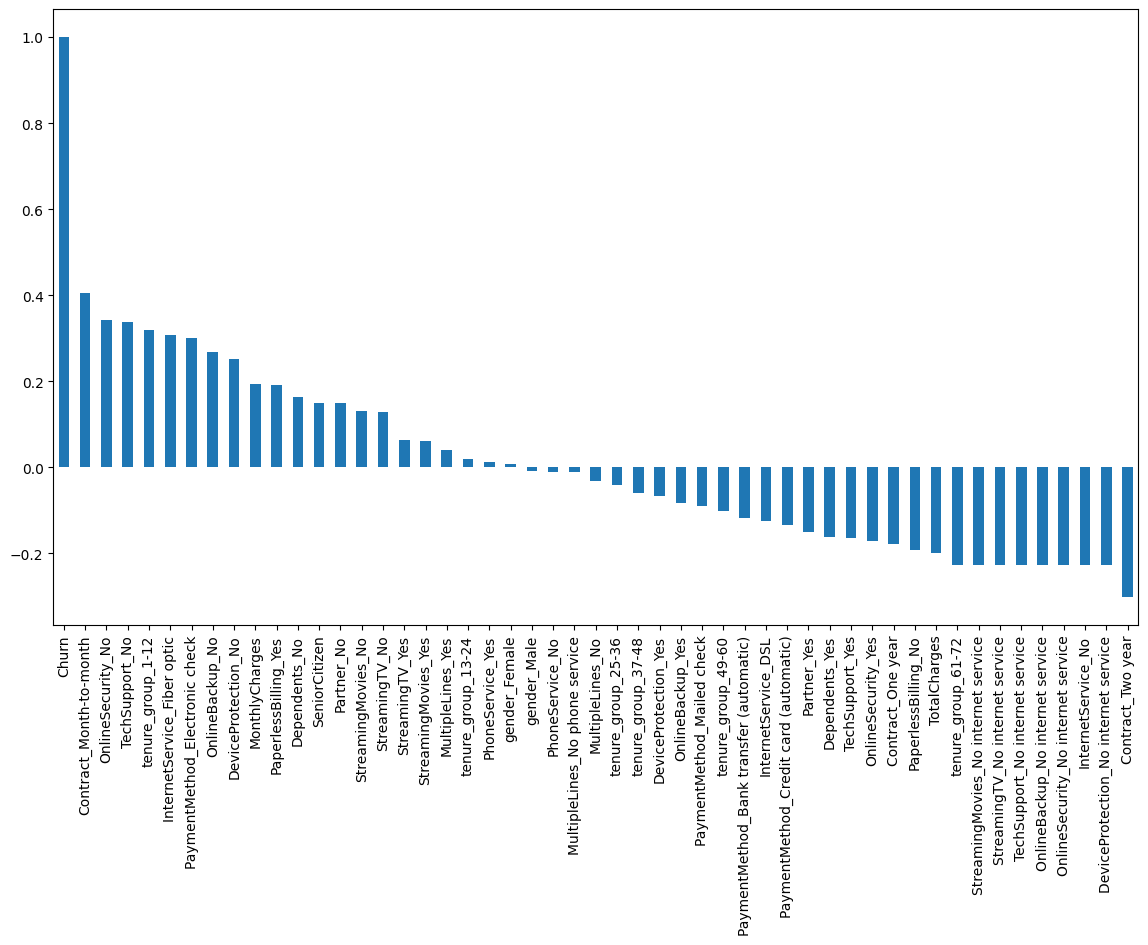

In [41]:
plt.figure(figsize=(14,8))
teleco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

###Bivariate Analysis

In [42]:
new_df1_target0=teleco_df.loc[teleco_df["Churn"]==0]
new_df1_target1=teleco_df.loc[teleco_df["Churn"]==1]

In [43]:
def uniplot(df,col,title,hue=None):

  plt.title(title)
  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright', width=0.5)

#For values on Bar
  for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')
  plt.show()

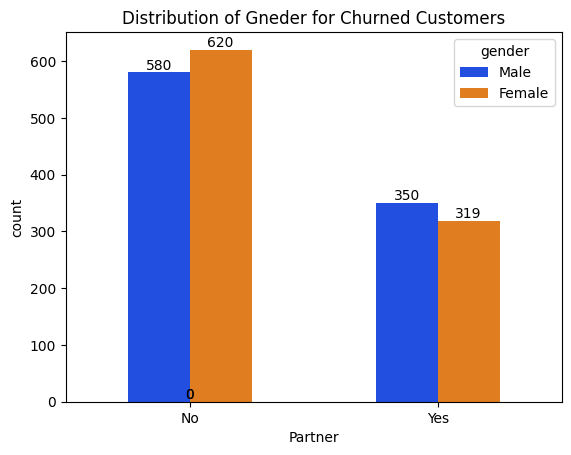

In [44]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gneder for Churned Customers', hue='gender')



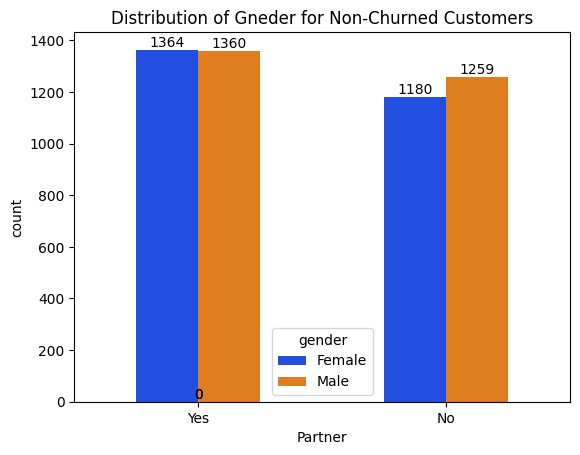

In [45]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gneder for Non-Churned Customers', hue='gender')

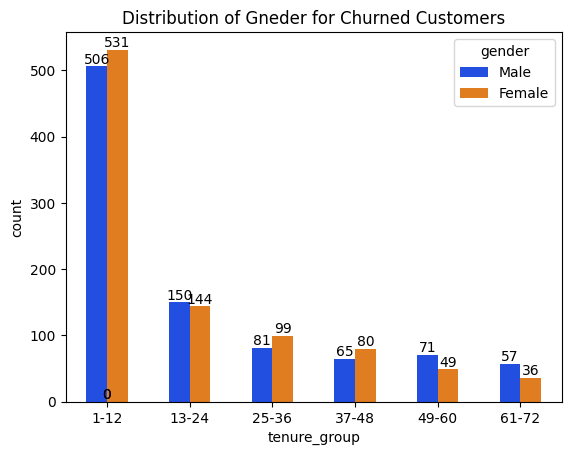

In [46]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Gneder for Churned Customers', hue='gender')

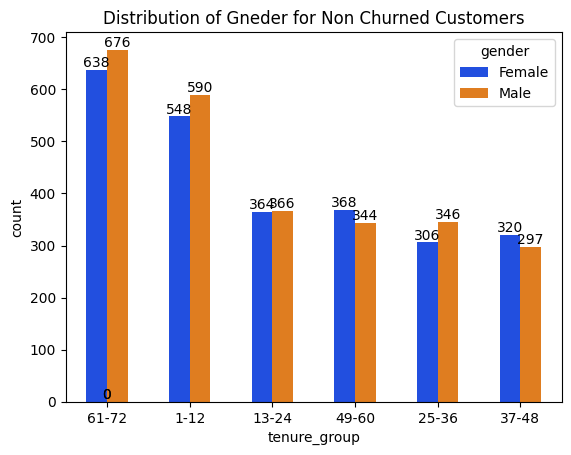

In [47]:
uniplot(new_df1_target0,col='tenure_group',title='Distribution of Gneder for Non Churned Customers', hue='gender')

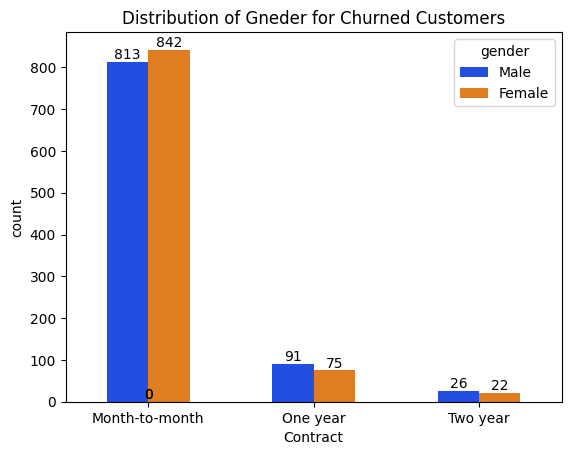

In [48]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Gneder for Churned Customers', hue='gender')

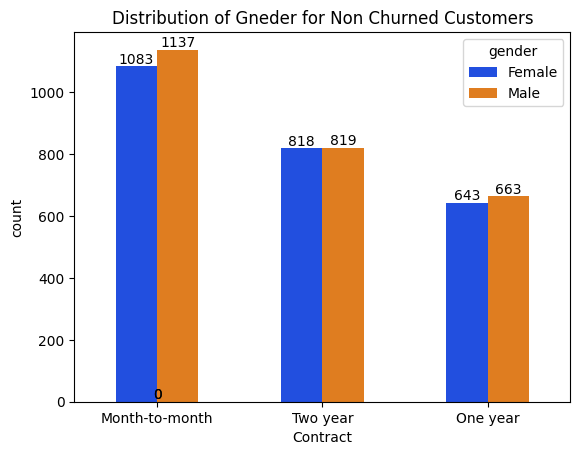

In [49]:
uniplot(new_df1_target0,col='Contract',title='Distribution of Gneder for Non Churned Customers', hue='gender')

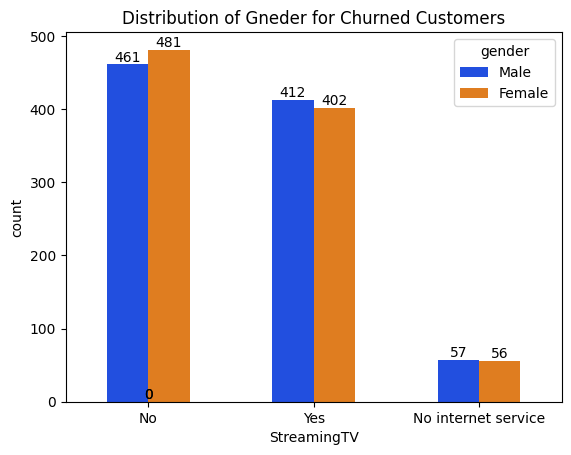

In [50]:
uniplot(new_df1_target1,col='StreamingTV',title='Distribution of Gneder for Churned Customers', hue='gender')

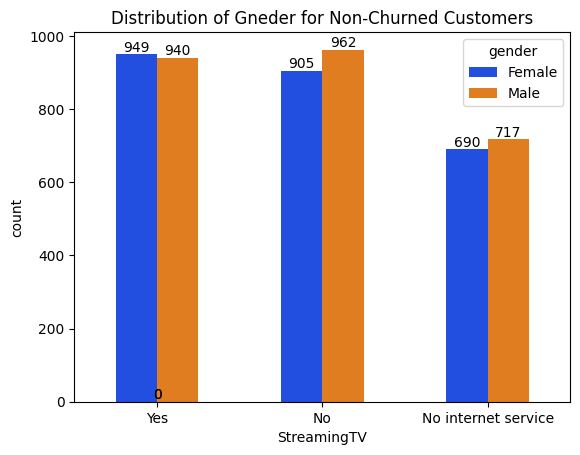

In [51]:
uniplot(new_df1_target0,col='StreamingTV',title='Distribution of Gneder for Non-Churned Customers', hue='gender')

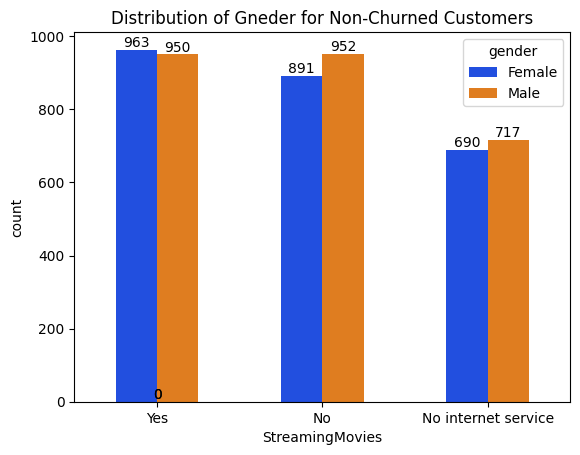

In [52]:
uniplot(new_df1_target0,col='StreamingMovies',title='Distribution of Gneder for Non-Churned Customers', hue='gender')

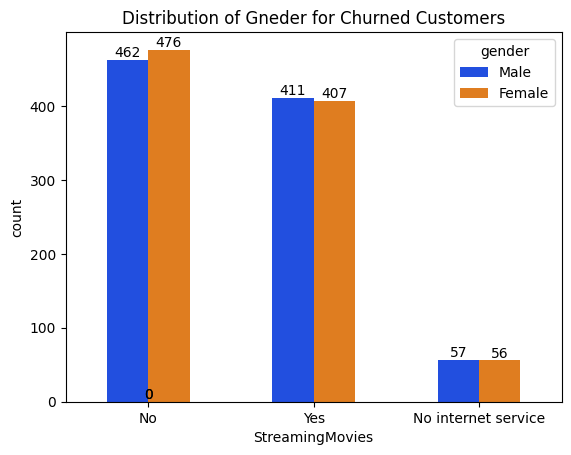

In [53]:
uniplot(new_df1_target1,col='StreamingMovies',title='Distribution of Gneder for Churned Customers', hue='gender')

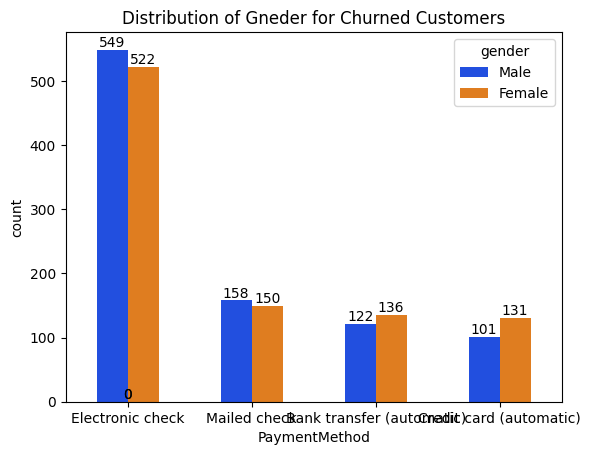

In [54]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of Gneder for Churned Customers', hue='gender')

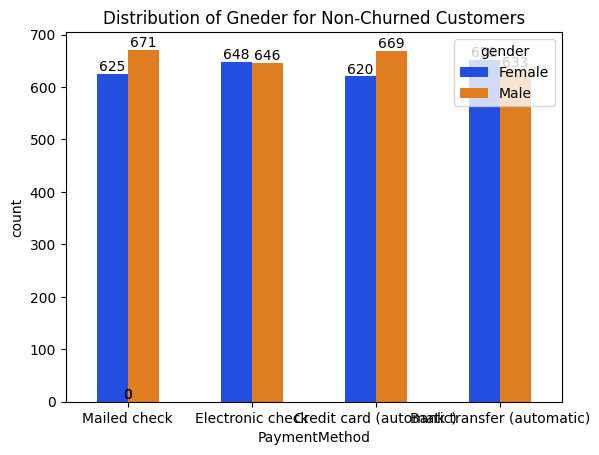

In [55]:
uniplot(new_df1_target0,col='PaymentMethod',title='Distribution of Gneder for Non-Churned Customers', hue='gender')

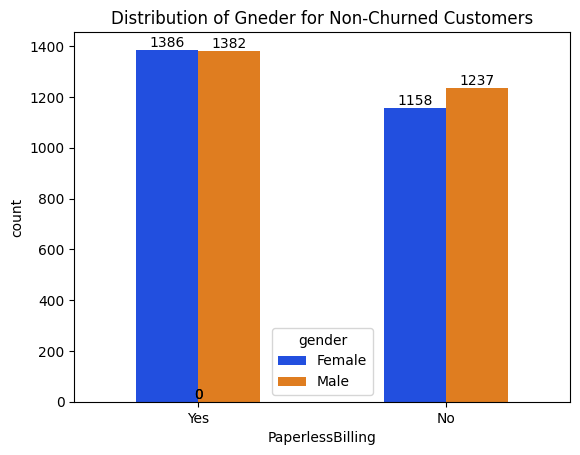

In [56]:
uniplot(new_df1_target0,col='PaperlessBilling',title='Distribution of Gneder for Non-Churned Customers', hue='gender')

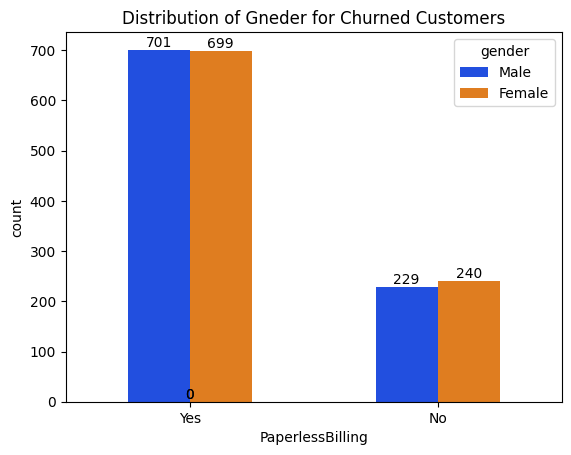

In [57]:
uniplot(new_df1_target1,col='PaperlessBilling',title='Distribution of Gneder for Churned Customers', hue='gender')

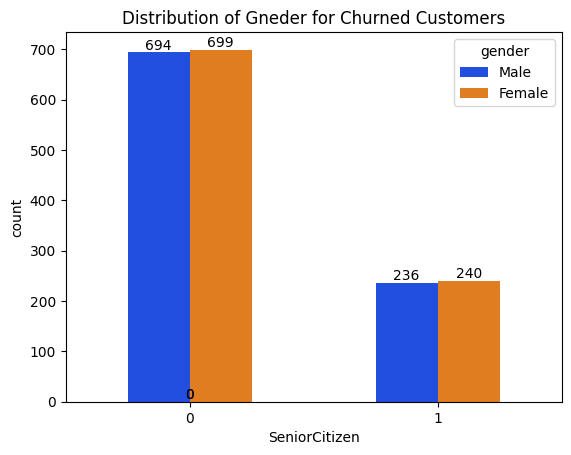

In [58]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of Gneder for Churned Customers', hue='gender')

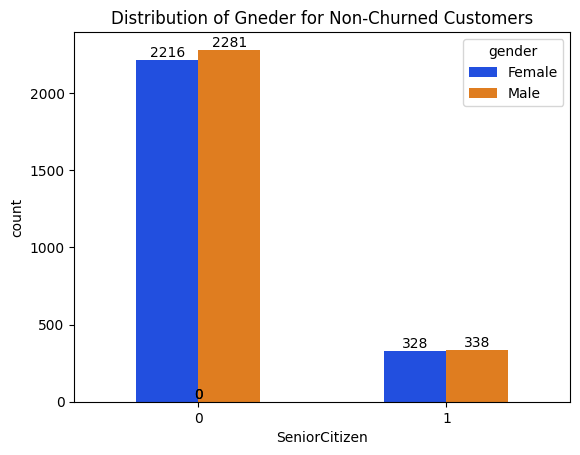

In [59]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of Gneder for Non-Churned Customers', hue='gender')

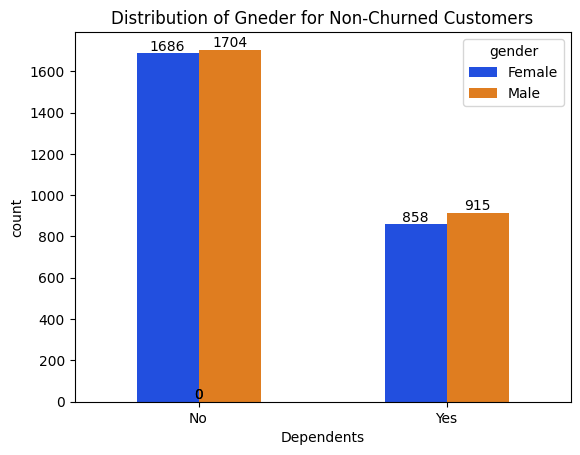

In [61]:
uniplot(new_df1_target0,col='Dependents',title='Distribution of Gneder for Non-Churned Customers', hue='gender')

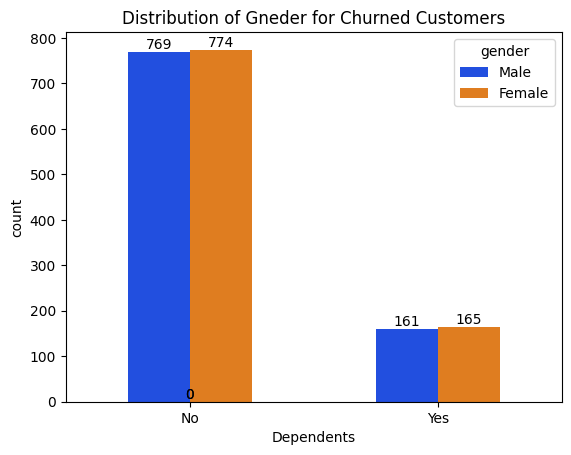

In [62]:
uniplot(new_df1_target1,col='Dependents',title='Distribution of Gneder for Churned Customers', hue='gender')

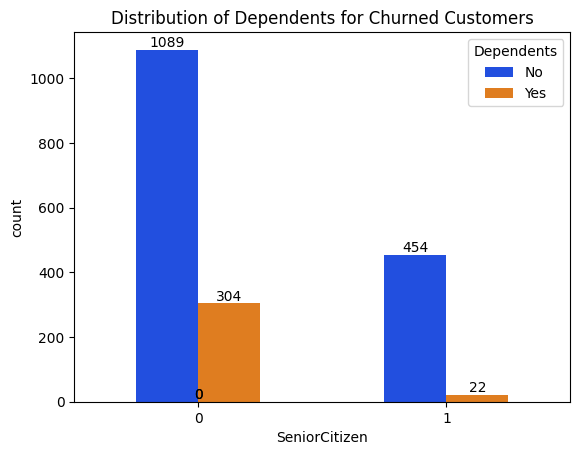

In [63]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of Dependents for Churned Customers', hue='Dependents')

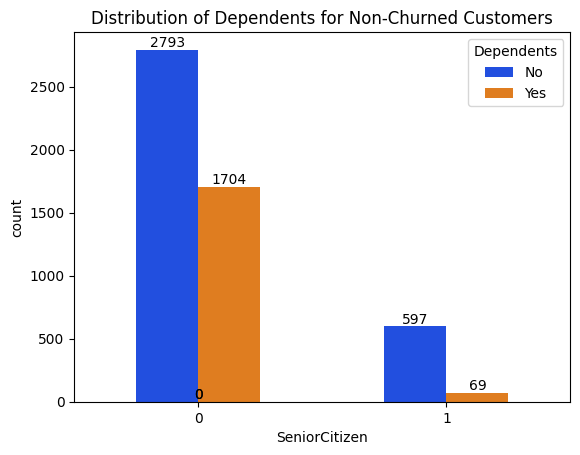

In [64]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of Dependents for Non-Churned Customers', hue='Dependents')

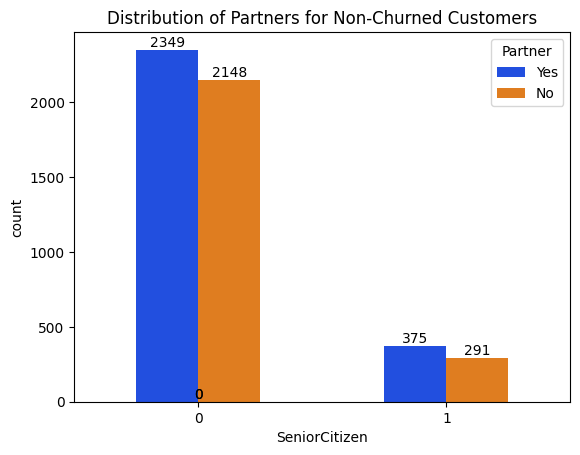

In [67]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of Partners for Non-Churned Customers', hue='Partner')

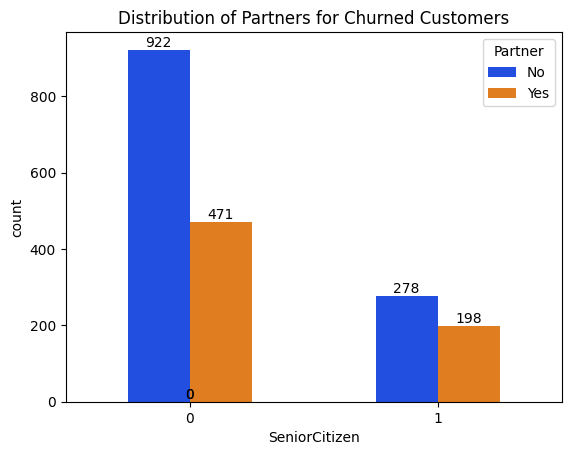

In [68]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of Partners for Churned Customers', hue='Partner')